**Building a Data Pipeline**

**1. Setup and Load Data**

In [2]:
!unzip Image_Sentiment_Classifier.zip

Archive:  Image_Sentiment_Classifier.zip
   creating: Deep Learning with Nicholas/
  inflating: Deep Learning with Nicholas/.DS_Store  
  inflating: __MACOSX/Deep Learning with Nicholas/._.DS_Store  
   creating: Deep Learning with Nicholas/.ipynb_checkpoints/
   creating: Deep Learning with Nicholas/data/
  inflating: Deep Learning with Nicholas/Image Sentiment Analyzer .ipynb  
  inflating: Deep Learning with Nicholas/.ipynb_checkpoints/Image Sentiment Analyzer -checkpoint.ipynb  
  inflating: Deep Learning with Nicholas/.ipynb_checkpoints/Deep Learning-checkpoint.ipynb  
   creating: Deep Learning with Nicholas/data/happy/
  inflating: __MACOSX/Deep Learning with Nicholas/data/._happy  
  inflating: Deep Learning with Nicholas/data/.DS_Store  
  inflating: __MACOSX/Deep Learning with Nicholas/data/._.DS_Store  
   creating: Deep Learning with Nicholas/data/sad/
  inflating: __MACOSX/Deep Learning with Nicholas/data/._sad  
  inflating: Deep Learning with Nicholas/data/happy/images26

In [3]:
!pip install tensorflow

In [ ]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
!pip install opencv-python

In [5]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [6]:
import tensorflow as tf
import os

In [7]:
#os is mainly used to navigate through file structure
os.path.join('data','happy')#here, data is the name of the directory and happy is the name of the folder

'data/happy'

In [8]:
os.listdir('/content/Deep Learning with Nicholas/data')
#os.listdir returns the list of folders inside the given directory

['happy', 'sad', '.DS_Store']

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
print(len(gpus))
gpus = tf.config.experimental.list_physical_devices('CPU')
print(gpus)

[]
0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [10]:
#Avoid OOM errors by setting GPU memory consumption
#OOM stands for "Out Of Memory error"
#Here, we are limiting our memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,true)

**2. Remove Dodgy Images**

In [11]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [12]:
data_dir = '/content/Deep Learning with Nicholas/data'
#a variable to hold the path to our data directory

In [13]:
os.listdir(data_dir)

['happy', 'sad', '.DS_Store']

In [14]:
os.listdir(os.path.join(data_dir,'happy'))

['images9.jpg',
 'happy-people3.jpg',
 'images6.jpg',
 'Happy.jpg',
 'happy-people4.jpg',
 'ce529eea8c0ca9987656fa90474563d6.jpg',
 'happy-people-jump-with-raised-arms-characters-win_107791-14884.jpg',
 'inspiringquotesaboutsuccess.png',
 'happypeople-1024x679.jpg',
 'Travis-Bradberry-Happy.jpg',
 'getty_107808336_9708069704500170_50554.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '_happy_jumping_on_beach-40815.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed.jpg',
 'habits-of-happy-people-jpg.jpg',
 'habits-of-happy-people.jpg',
 'hile-collaborating-on-a-new-project-in-an-office-group-of-diverse-2159023891.jpg',
 'happy-people2.jpeg',
 'happy-indians_5f66fd46d9f5b.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'image26.jpeg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '1920px-face-smile.svg_.png',
 'maxresdefault.jpg',
 'compassion.jpg',
 'goup-happy-people-35582464.jpg',
 'happy-people-crowd-board-text-80

In [15]:
image_exts = ['jpeg','jpg','bmp','png']
#image_exts is used for Image Extensions

In [16]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [17]:
#We'll go to the images data folder and will remove all image files with size less than 10kb, cause they are probably very small images
#We can also download and store more images

In [18]:
#I've removed all the images with size less than 10kb

In [19]:
#Now

In [20]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad
.DS_Store


In [21]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        print(image)

images9.jpg
happy-people3.jpg
images6.jpg
Happy.jpg
happy-people4.jpg
ce529eea8c0ca9987656fa90474563d6.jpg
happy-people-jump-with-raised-arms-characters-win_107791-14884.jpg
inspiringquotesaboutsuccess.png
happypeople-1024x679.jpg
Travis-Bradberry-Happy.jpg
getty_107808336_9708069704500170_50554.jpg
1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
_happy_jumping_on_beach-40815.jpg
Happiness-Habits-10-Things-Happy-People-Do-Before-Bed.jpg
habits-of-happy-people-jpg.jpg
habits-of-happy-people.jpg
hile-collaborating-on-a-new-project-in-an-office-group-of-diverse-2159023891.jpg
happy-people2.jpeg
happy-indians_5f66fd46d9f5b.jpg
gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg
image26.jpeg
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
1920px-face-smile.svg_.png
maxresdefault.jpg
compassion.jpg
goup-happy-people-35582464.jpg
happy-people-crowd-board-text-8048542.jpg
hand-drawn-happy-people-jumping_23-2149092878.jpg
group-people-posing-photo-with-words-happy-bot

NotADirectoryError: ignored

In [22]:
cv2.imread(os.path.join('/content/Deep Learning with Nicholas/data','happy','1HEoLBLidT2u4mhJ0oiDgig.png'))

array([[[241, 249, 255],
        [239, 247, 255],
        [239, 247, 255],
        ...,
        [236, 244, 254],
        [234, 242, 252],
        [236, 244, 254]],

       [[241, 249, 255],
        [239, 247, 255],
        [239, 247, 255],
        ...,
        [236, 244, 254],
        [234, 242, 252],
        [236, 244, 254]],

       [[241, 249, 255],
        [239, 247, 255],
        [239, 247, 255],
        ...,
        [236, 244, 254],
        [234, 242, 252],
        [236, 244, 254]],

       ...,

       [[ 55,  90, 101],
        [ 61,  95, 106],
        [ 65,  99, 110],
        ...,
        [ 54,  91,  86],
        [ 63,  99,  95],
        [ 52,  88,  88]],

       [[ 70, 104, 117],
        [ 60,  94, 105],
        [ 67, 102, 111],
        ...,
        [ 58,  93,  91],
        [ 52,  88,  88],
        [ 49,  84,  88]],

       [[ 59,  92, 107],
        [ 63,  98, 110],
        [ 60,  95, 106],
        ...,
        [ 54,  89,  90],
        [ 59,  94,  96],
        [ 53,  88,  95]]

<class 'numpy.ndarray'>
(933, 1400, 3)


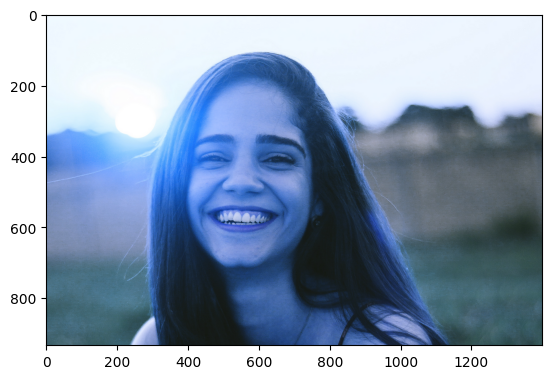

In [23]:
file_path = '/content/Deep Learning with Nicholas/data/happy/1HEoLBLidT2u4mhJ0oiDgig.png'
img = cv2.imread(file_path)
print(type(img))
print(img.shape)#3 means it is a three channel i.e., colored image.
#3648 rows i.e., Height
#5472 columns i.e., Width
plt.imshow(img)

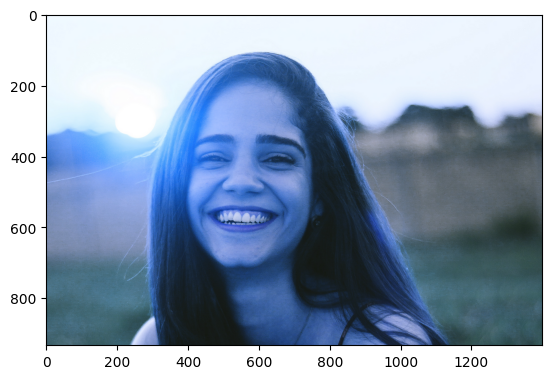

In [24]:
plt.imshow(img)
plt.show()

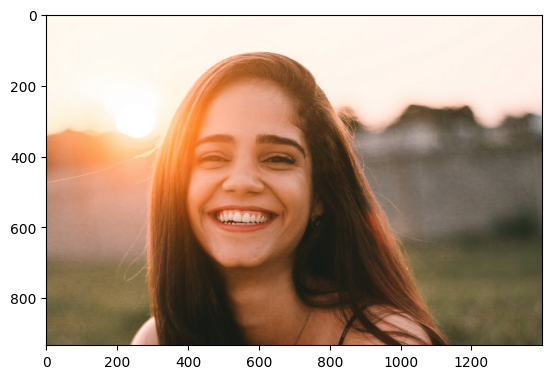

In [25]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

Image not in ext list /content/Deep Learning with Nicholas/data/happy/hile-collaborating-on-a-new-project-in-an-office-group-of-diverse-2159023891.jpg
Image not in ext list /content/Deep Learning with Nicholas/data/happy/smiling-people-holding-mockup-banner-260nw-2310282601.jpg
Image not in ext list /content/Deep Learning with Nicholas/data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list /content/Deep Learning with Nicholas/data/sad/sad-serious-illness-womandepressed-emotion-260nw-1810793920.jpg
Image not in ext list /content/Deep Learning with Nicholas/data/sad/1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Image not in ext list /content/Deep Learning with Nicholas/data/sad/african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in ext list /content/Deep Learning with Nicholas/data/sad/depositphotos_11207956-stock-photo-thoughtful-man-in-the-living.jpg
Image not in ext list /content/Deep Learning with Nicholas/data/sad/very-sad-m

NotADirectoryError: ignored

**3. Load Data**

In [27]:
#Tensorflow has a dataset API
#It allows us to build data pipelines so rather than loading everything in memory to begin
#with
#It allows us to scale out to much larger datasets but it also gives us a repeatable set
#of steps that we're going to apply to our data.

In [28]:
tf.data.Dataset??
#`tf.data.Dataset` API

In [29]:
#We are going to use Keras utility which actually allows us to do it

In [30]:
#tf.data.Dataset.from_generator
#tf.data.Dataset.from_tensor_slices
#tf.data.Dataset.from_tensors
#tf.data.Dataset.list_files #(to load data from a directory)

In [31]:
import numpy as np
from matplotlib import pyplot as plt

In [32]:
tf.keras.utils.image_dataset_from_directory??

In [33]:
tf.keras.utils.image_dataset_from_directory('/content/Deep Learning with Nicholas/data',batch_size=8,image_size=(128,128))

Found 161 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [125]:
data = tf.keras.utils.image_dataset_from_directory('/content/Deep Learning with Nicholas/data')
#building our data pipeline

Found 161 files belonging to 2 classes.


In [35]:
data_iterator = data.as_numpy_iterator()
#allowing us to access our data pipeline

In [36]:
#data_iterator

In [52]:
#Get another batch from the iterator
batch = data_iterator.next()
#grabbing one batch back

In [53]:
len(batch)

2

In [54]:
batch[0]
#Images are there in Key 0

array([[[[123.        , 109.        , 124.        ],
         [122.75      , 110.75      , 124.75      ],
         [122.70703   , 110.70703   , 124.70703   ],
         ...,
         [ 99.15234   ,  91.15234   , 106.15234   ],
         [ 99.09766   ,  91.09766   , 106.09766   ],
         [ 99.        ,  91.        , 106.        ]],

        [[123.        , 109.        , 124.        ],
         [122.75      , 110.75      , 124.75      ],
         [123.87109   , 111.87109   , 125.87109   ],
         ...,
         [100.87109   ,  92.87109   , 107.87109   ],
         [ 99.        ,  91.        , 106.        ],
         [ 98.        ,  90.        , 105.        ]],

        [[124.        , 110.        , 125.        ],
         [123.        , 111.        , 125.        ],
         [124.        , 112.        , 126.        ],
         ...,
         [100.046875  ,  92.046875  , 107.046875  ],
         [100.03516   ,  92.03516   , 107.03516   ],
         [ 98.046875  ,  90.046875  , 105.046875  ]],

In [55]:
#Class 1 = Sad People
#Class 2 = Happy People
batch[1]
#Labels are there in Key 1

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [59]:
#Images represented as numpy arrays
batch[0].shape
#Here we got (32,256,256,3), which means that we got 32 images of shape 256 by 256 by 3 channels

(32, 256, 256, 3)

In [57]:
batch

(array([[[[123.        , 109.        , 124.        ],
          [122.75      , 110.75      , 124.75      ],
          [122.70703   , 110.70703   , 124.70703   ],
          ...,
          [ 99.15234   ,  91.15234   , 106.15234   ],
          [ 99.09766   ,  91.09766   , 106.09766   ],
          [ 99.        ,  91.        , 106.        ]],
 
         [[123.        , 109.        , 124.        ],
          [122.75      , 110.75      , 124.75      ],
          [123.87109   , 111.87109   , 125.87109   ],
          ...,
          [100.87109   ,  92.87109   , 107.87109   ],
          [ 99.        ,  91.        , 106.        ],
          [ 98.        ,  90.        , 105.        ]],
 
         [[124.        , 110.        , 125.        ],
          [123.        , 111.        , 125.        ],
          [124.        , 112.        , 126.        ],
          ...,
          [100.046875  ,  92.046875  , 107.046875  ],
          [100.03516   ,  92.03516   , 107.03516   ],
          [ 98.046875  ,  90.04

0.0

255.0

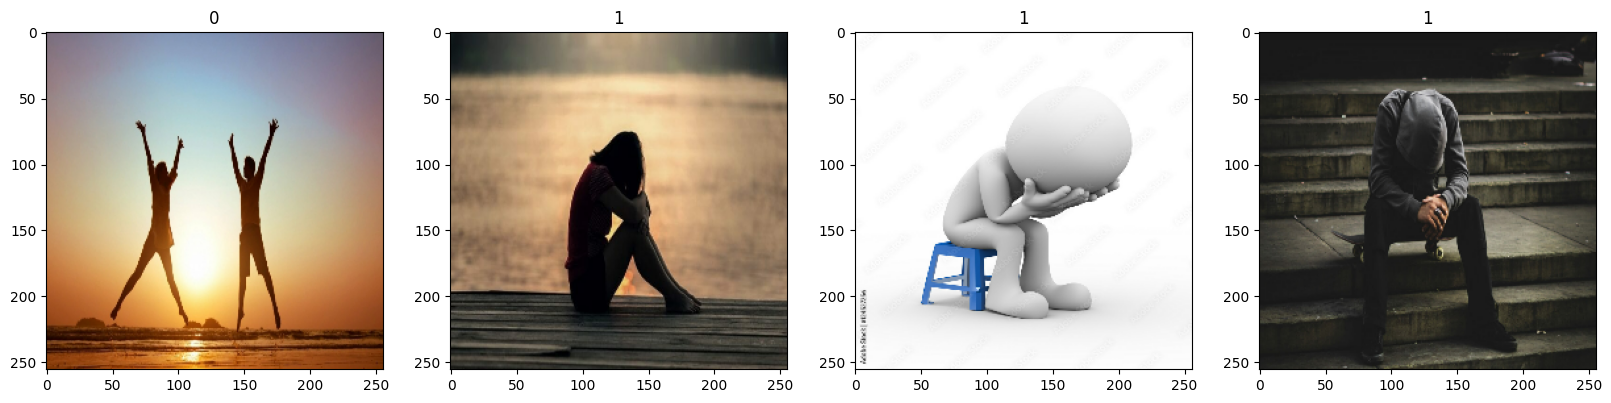

In [62]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [63]:
batch[0].min()

0.0

In [64]:
batch[0].max()

255.0

In [65]:
scaled = batch[0]/256

In [66]:
scaled.max()

0.99609375

**Preprocess Data**

**1. Scale Data**

In [126]:
data = data.map(lambda x,y: (x/255,y))

In [127]:
data.as_numpy_iterator().next()

(array([[[[0.29626226, 0.35900736, 0.42175245],
          [0.291075  , 0.34205538, 0.40872204],
          [0.30354244, 0.36628753, 0.42903262],
          ...,
          [0.24561217, 0.32404354, 0.3671808 ],
          [0.19258866, 0.27102003, 0.31415728],
          [0.16068666, 0.23911802, 0.26656902]],
 
         [[0.29311523, 0.35586032, 0.41860542],
          [0.29207835, 0.34305874, 0.40972543],
          [0.31729665, 0.38004175, 0.44278684],
          ...,
          [0.24035022, 0.31878158, 0.36191884],
          [0.20876226, 0.28719363, 0.33033088],
          [0.24612534, 0.3245567 , 0.3520077 ]],
 
         [[0.26425686, 0.32700196, 0.38974705],
          [0.30681583, 0.36956093, 0.43230602],
          [0.29223347, 0.35497856, 0.41772366],
          ...,
          [0.24583334, 0.3125    , 0.34387255],
          [0.24146657, 0.31989795, 0.3630352 ],
          [0.22607327, 0.30180857, 0.32925954]],
 
         ...,
 
         [[0.44190794, 0.29966396, 0.11393612],
          [0.34316

In [128]:
data.as_numpy_iterator().next()[0]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [129]:
data.as_numpy_iterator().next()[0].min()

0.0

In [130]:
data.as_numpy_iterator().next()[0].max()

1.0

In [131]:
scaled_iterator = data.as_numpy_iterator()

In [95]:
scaled_iterator.next()

(array([[[[2.58823544e-01, 3.68627459e-01, 7.84313753e-02],
          [2.52115101e-01, 3.54075879e-01, 6.78013787e-02],
          [2.31771499e-01, 3.33732277e-01, 5.53009026e-02],
          ...,
          [9.22241986e-01, 9.61457670e-01, 6.80881679e-01],
          [9.20129836e-01, 9.61980283e-01, 6.56699896e-01],
          [9.16884065e-01, 9.52178180e-01, 6.32677555e-01]],
 
         [[2.58823544e-01, 3.68627459e-01, 7.84313753e-02],
          [2.49299586e-01, 3.51260364e-01, 6.49858639e-02],
          [2.28835344e-01, 3.30796123e-01, 5.23647517e-02],
          ...,
          [9.27198231e-01, 9.64393854e-01, 6.94939196e-01],
          [9.19638455e-01, 9.61488962e-01, 6.60232842e-01],
          [9.13725495e-01, 9.51799929e-01, 6.17968738e-01]],
 
         [[2.54365146e-01, 3.64169061e-01, 7.39729926e-02],
          [2.43068323e-01, 3.45029116e-01, 5.87545969e-02],
          [2.27450982e-01, 3.29411775e-01, 5.09803928e-02],
          ...,
          [9.33490872e-01, 9.68072712e-01, 7.2191

In [132]:
scaled_iterator.next()[0].max()

1.0

In [133]:
batch = scaled_iterator.next()

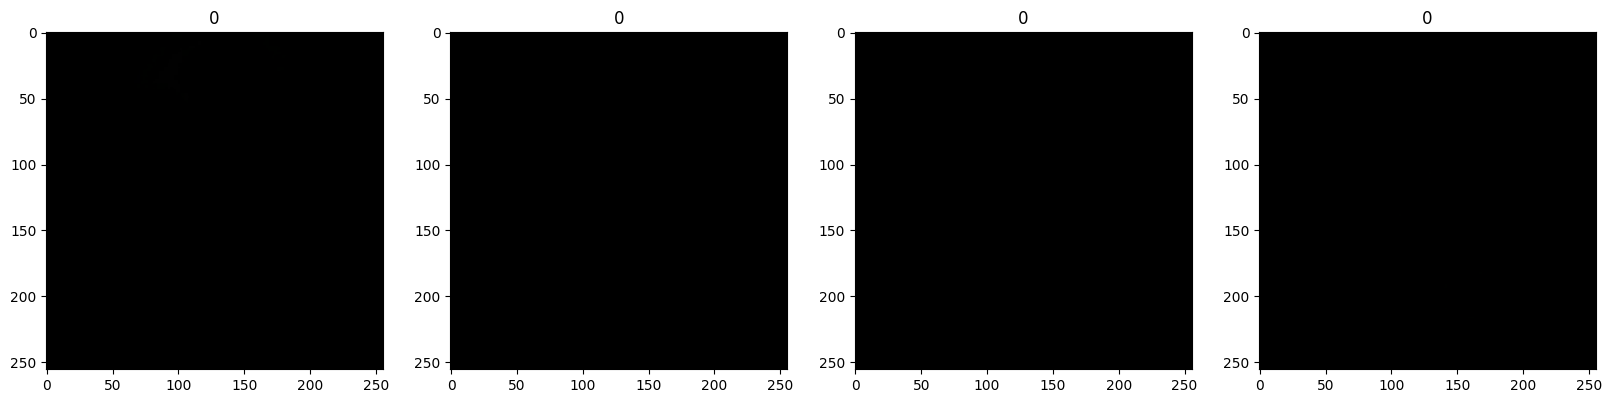

In [134]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

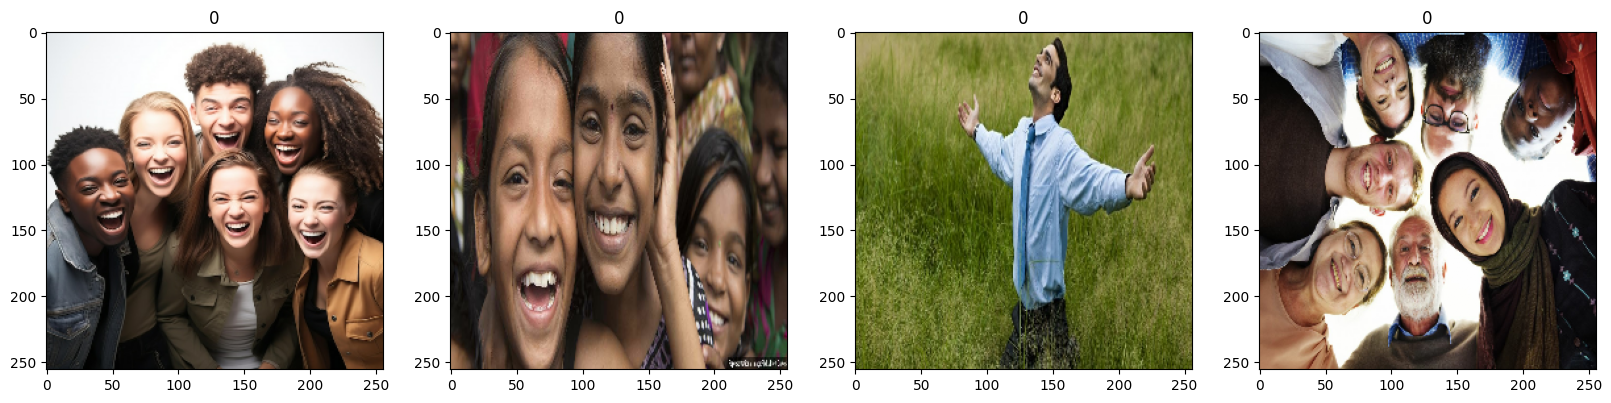

In [135]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

**2. Split Data**

In [110]:
len(data)
#If we get 6 as output then it means that we have 6 batches and each batch is going to have 32 images.

6

In [136]:
6*.7

4.199999999999999

In [111]:
"""train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)"""

In [141]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [142]:
print(train_size)
print(val_size)
print(test_size)

4
2
1


In [143]:
train_size + val_size + test_size

7

In [144]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [145]:
len(train)

4

In [146]:
len(val)

2

In [147]:
len(test)

0

**Building the Deep Neural Network**

1. Build Deep Learning Model